### Hotel Reservations: 

Our dataset comes from Kaggle and can be found at the following link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

The dataset contains roughly 36,300 instances, each representing an individual hotel reservation. There are 19 features, which are the attributes of customers' hotel reservations. The features are as follows: Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled. avg_price_per_room, no_of_special_requests, and booking_status. 

Our target variable is booking_status, which is defined in the dataset information as a "flag indicating if the booking was canceled or not." We chose this feature as our target variable because the aim of our project is to determine the likelihood of a booking being canceled and which features are the best predictors of this cancellation. 

In [95]:
import pandas as pd

hotel_data = pd.read_csv('./Hotel Reservations.csv')

In [96]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [97]:
print(hotel_data.shape)

(36275, 19)


In [98]:
# find missing values
print(hotel_data.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


There are no missing values.

In [99]:
print(hotel_data.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


Some features, and even the target variable, are not numerical. We will need to make these values numerical in preprocessing.

### Pre-processing

In [100]:
# make Booking_ID an integer
hotel_data['Booking_ID'] = hotel_data['Booking_ID'].apply(lambda x: int(x[3:]))

In [101]:
# Use one-hot encoding to convert categorical data into numerical
# data. This introduces new features into the dataset.
hotel_data = pd.get_dummies(hotel_data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

In [102]:
print(hotel_data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [103]:
# Transform the booking_status by mapping to a binary encoding.
hotel_data['booking_status'] = hotel_data['booking_status'].map({'Canceled': 0, 'Not_Canceled': 1})

print(hotel_data.dtypes)


Booking_ID                                int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1              bool
type_of_meal_plan_Meal Plan 2              bool
type_of_meal_plan_Meal Plan 3              bool
type_of_meal_plan_Not Selected             bool
room_type_reserved_Room_Type 1          

All fields are now numerical.

### Correlation Analysis

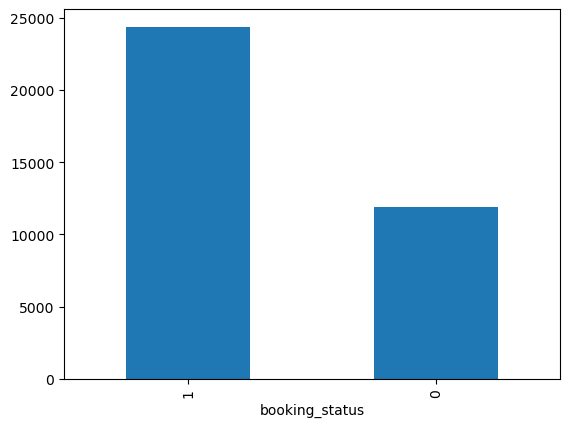

In [104]:
import matplotlib.pyplot as plt

hotel_data['booking_status'].value_counts().plot(kind='bar')

plt.show()

32.8% of all reservations are cancelled. Although not perfectly balanced with respect to the target variable, this skew is not too servere. Given a more severe skew or should we believe this an issue going forward, we could consider employing techniques such as under/over sampling to address the imbalance.

In [105]:
corr = hotel_data.corr()
print(corr['booking_status'].sort_values(ascending=False))

booking_status                          1.000000
no_of_special_requests                  0.253070
market_segment_type_Corporate           0.112993
repeated_guest                          0.107287
required_car_parking_space              0.086185
market_segment_type_Complementary       0.072867
type_of_meal_plan_Meal Plan 1           0.061267
no_of_previous_bookings_not_canceled    0.060179
market_segment_type_Offline             0.038351
no_of_previous_cancellations            0.033728
room_type_reserved_Room_Type 1          0.020326
room_type_reserved_Room_Type 7          0.014062
arrival_month                           0.011233
room_type_reserved_Room_Type 5          0.010224
market_segment_type_Aviation            0.003964
type_of_meal_plan_Meal Plan 3           0.003193
room_type_reserved_Room_Type 3          0.001241
room_type_reserved_Room_Type 2         -0.000548
type_of_meal_plan_Not Selected         -0.003072
Booking_ID                             -0.006237
arrival_date        

Features such as Booking_ID and arrival_date have little to no correlation with our target variable. Features such as lead_time and no_of_special_requests have stronger correlations to our target variable. For lead_time, there is a negative correlation between this feature and the binary target varible. Keeping in mind that 1 signifies a non-canceled booking, as lead_time increases, the booking is more likely to be canceled.

Another set of features worth examining are the 5 varieties market_segement_types. Some market types such as coperate, complimentary, offline, and aviation have positive correlations to the target variable, while segement type online has a negative correlation. This suggests various relationships between the type of reservation and whether the reservation was canceled or not. One such relationship is that online bookings are more likely to be canceled than in-person bookings.

In [106]:
import matplotlib.pyplot as plt

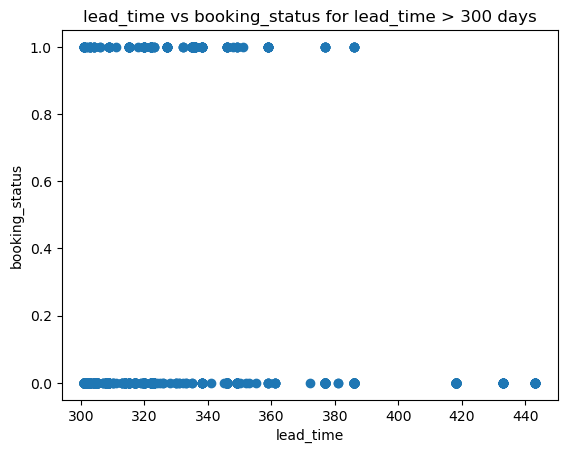

In [107]:
large_lead_time_data = hotel_data[hotel_data['lead_time'] > 300]

plt.scatter(large_lead_time_data['lead_time'], large_lead_time_data['booking_status'])
plt.xlabel('lead_time')
plt.ylabel('booking_status')
plt.title('lead_time vs booking_status for lead_time > 300 days')
plt.show()


Taking a closer look at lead time, we can start to visualize the negative correlation between lead_time and booking_status. Reservations done further in advance are more likely to be cancelled.

### Short analysis of arrival_month and arrival_date

We were not sure whether or not there was any significance to the arrival_month or arrival_date so we would know if we should do a cyclical encoding or not.

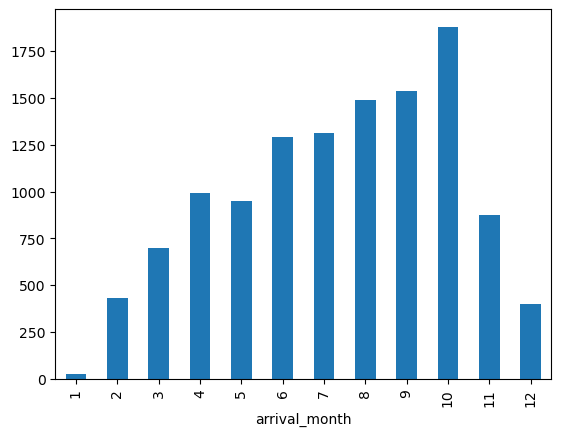

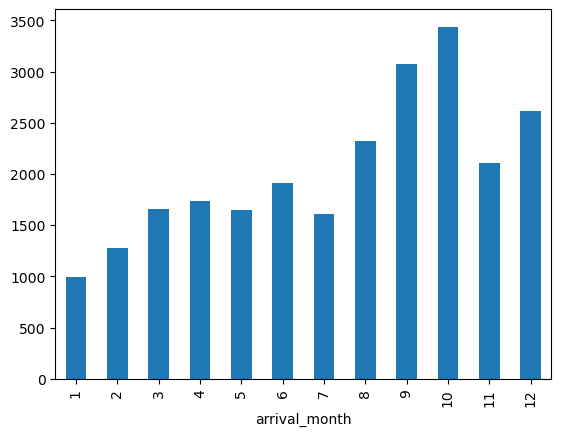

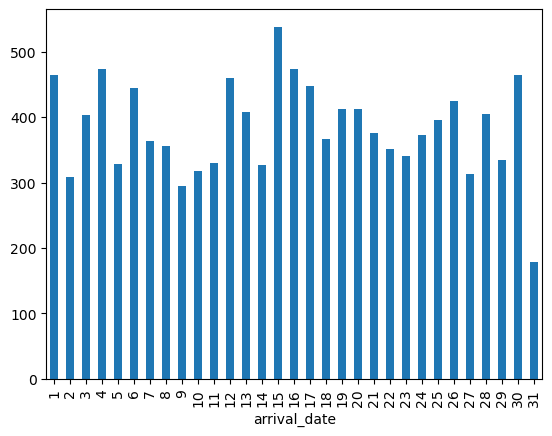

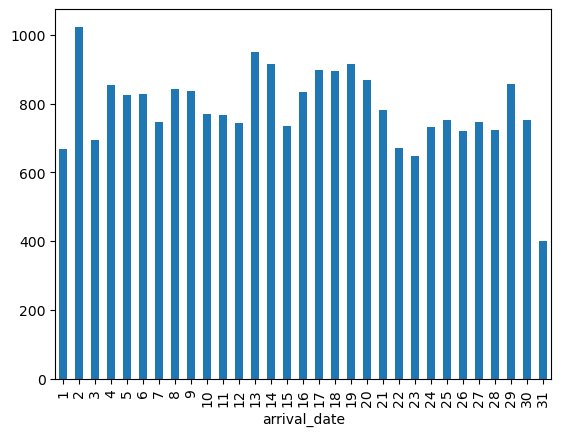

In [108]:
hotel_data_cancelled = hotel_data[hotel_data['booking_status'] == 0]
hotel_data_not_cancelled = hotel_data[hotel_data['booking_status'] == 1]

hotel_data_cancelled['arrival_month'].value_counts().sort_index().plot(kind='bar')
plt.show()
hotel_data_not_cancelled['arrival_month'].value_counts().sort_index().plot(kind='bar')
plt.show()
hotel_data_cancelled['arrival_date'].value_counts().sort_index().plot(kind='bar')
plt.show()
hotel_data_not_cancelled['arrival_date'].value_counts().sort_index().plot(kind='bar')
plt.show()

From looking at these graphs and comparing the number of bookings kept per month and the number of bookings cancelled per month it looks like the only two months that might have any significance would be January and December. However, all of the other months look like there is no significance so it does not make sense to use or make cyclical. Looking at the number of bookings for arrival date kept vs number of bookings canceled for arrival date it does not look like there is any significance between days of the month so it is unnesessary and not helpful to the model to keep these variables.

In [109]:
hotel_data.drop(['arrival_month', 'arrival_date', 'Booking_ID', 'arrival_year'], axis=1, inplace=True)
print(hotel_data.dtypes)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1              bool
type_of_meal_plan_Meal Plan 2              bool
type_of_meal_plan_Meal Plan 3              bool
type_of_meal_plan_Not Selected             bool
room_type_reserved_Room_Type 1             bool
room_type_reserved_Room_Type 2             bool
room_type_reserved_Room_Type 3             bool
room_type_reserved_Room_Type 4             bool
room_type_reserved_Room_Type 5          

### PCA Dimensionality Reduction 

Since the hotel reservations dataset contains 19 features, we continue by using PCA (principal component analysis) for dimensionality reduction. For our initial implementation, we start by reducing to 2 dimensions to get an initial sense for the data (and because a dimensionality of 2 is appropriate for data visualization). 

In [110]:
# initial implementation (2 dimensions)
from sklearn.decomposition import PCA

# create feature set X and target variable y
X = hotel_data.drop('booking_status', axis=1)
y = hotel_data['booking_status']

pca = PCA(n_components=2)
hotal2D = pca.fit_transform(X)

print(hotal2D)

[[139.88061933 -34.15987709]
 [-80.2923924    0.80086204]
 [-82.86485553 -45.98627595]
 ...
 [ 62.90002595  -3.0954772 ]
 [-21.94692664  -9.59995597]
 [119.92749361  61.93664024]]


In [111]:
print(pca.explained_variance_ratio_)

[0.85694104 0.14212837]


The explained variance ratio indicates the proportion of a dataset's variance explained by each principal component. The results show that the first principal component in the hotel reservations dataset accounts for a vast majority of the variance (roughly 99.99%). 

Next, we implement PCA with the optimal number of dimensions. In this case, we reduce down to the number of dimensions accounting for 95% of the variance.

In [112]:
# implementation with optimal number of dimensions 
import numpy as np

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

print(pca.n_components_)

2


The optimal number of dimensions for this dataset is merely one. (Since our first principal component accounts for 99.99% of the variance, this is what we would expect based on the explained variance ratio.) This indicates that the vast majority of the variance in the hotel reservations dataset can be explained by just one linear combination of features. 

### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

log_reg_coefficients = log_reg.coef_
coefficients_df = pd.DataFrame(log_reg_coefficients, columns=X.columns)
print("Coefficients:")
print(coefficients_df)



Coefficients:
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0     -0.056202       -0.058754             -0.112828          -0.040708   

   required_car_parking_space  lead_time  repeated_guest  \
0                    0.293952  -1.342494        0.364251   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                      -0.09901                              0.110753   

   avg_price_per_room  ...  room_type_reserved_Room_Type 3  \
0           -0.658787  ...                       -0.016005   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                        0.009508                        0.036232   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                        0.126637                        0.075422   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                     -0.061481                           0.602212   

   market_segment_typ

Testing accuracy, Precision and recall

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8042783107288566
Precision: 0.8216762134458848
Recall: 0.9020354128744001


### Decision Tree Classifier

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f' confusion matrix: \n {confusion_matrix(y_test, y_pred)}\n\n')
print(f' classification report: \n {classification_report(y_test, y_pred)}')

 confusion matrix: 
 [[2414  612]
 [ 684 5359]]


 classification report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3026
           1       0.90      0.89      0.89      6043

    accuracy                           0.86      9069
   macro avg       0.84      0.84      0.84      9069
weighted avg       0.86      0.86      0.86      9069



Training a basic decision tree classifier results in a 86% accuracy. It is important to note no hyper parameters are configured during this and better results could likely be achived using better hyperparameters found with grid search. The weakest performing aspect of the model seems to be when prediciting canceled bookings which was to be expected given the slight imbalance of the target variable in our dataset. In the metrics, this comes through as the lower scores for the canceled (0) class.

Going forward, we will configure the hyperparamters and deploy other models and compare their performances.